# Introduction

Given a dataset of a sample of flights to and from SFO, we will try to predict the cargo volume of a flight in tons.

The features we are provided is Activity Period, Operating Airline and its IATA Code, Published Airline and its IATA code, Whether a flight if domestic or international, where in particular a flight is going or coming from, wheher the flight is an arrival or a departure, the type of cargo, and the type of aircraft.

# EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Cargo Volume - Train.csv')
df

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Metric TONS
0,201601,Sun Country Airlines,SY,Sun Country Airlines,SY,Domestic,US,Enplaned,Cargo,Passenger,8.871509
1,200811,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Cargo,Passenger,53.946194
2,200709,Qantas Airways,QF,Qantas Airways,QF,International,Australia / Oceania,Deplaned,Express,Passenger,0.043999
3,201608,Philippine Airlines,PR,Philippine Airlines,PR,International,Asia,Deplaned,Mail,Passenger,19.023530
4,201708,Singapore Airlines,SQ,Singapore Airlines,SQ,International,Asia,Deplaned,Express,Passenger,6.951420
...,...,...,...,...,...,...,...,...,...,...,...
27225,201108,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Canada,Enplaned,Express,Passenger,5.687690
27226,200703,Asiana Airlines,OZ,Asiana Airlines,OZ,International,Asia,Deplaned,Mail,Freighter,3.473669
27227,201204,US Airways,US,US Airways,US,Domestic,US,Deplaned,Cargo,Passenger,18.564941
27228,201005,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Cargo,Passenger,9.814090


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27230 entries, 0 to 27229
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Activity Period              27230 non-null  int64  
 1   Operating Airline            27230 non-null  object 
 2   Operating Airline IATA Code  27199 non-null  object 
 3   Published Airline            27230 non-null  object 
 4   Published Airline IATA Code  27199 non-null  object 
 5   GEO Summary                  27230 non-null  object 
 6   GEO Region                   27230 non-null  object 
 7   Activity Type Code           27230 non-null  object 
 8   Cargo Type Code              27230 non-null  object 
 9   Cargo Aircraft Type          27230 non-null  object 
 10  Cargo Metric TONS            27230 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 2.3+ MB


Most of the data are strings which will need to be converted into numerical data. In addition, while ``Operating Airline IATA Code`` and ``Published Airline IATA Code`` have null values, they are different ways to represent ``Operating Airline`` and ``Published Airline`` respecively. As such, we can drop the columns without losing data.

In [3]:
df.describe()

,Activity Period,Cargo Metric TONS
count,27230.000000,27230.000000
mean,201277.964378,216.669953
std,451.796120,432.731356
min,200507.000000,0.000454
25%,200904.000000,8.446826
50%,201303.000000,60.774235
75%,201703.000000,247.236041
max,202012.000000,10801.278330


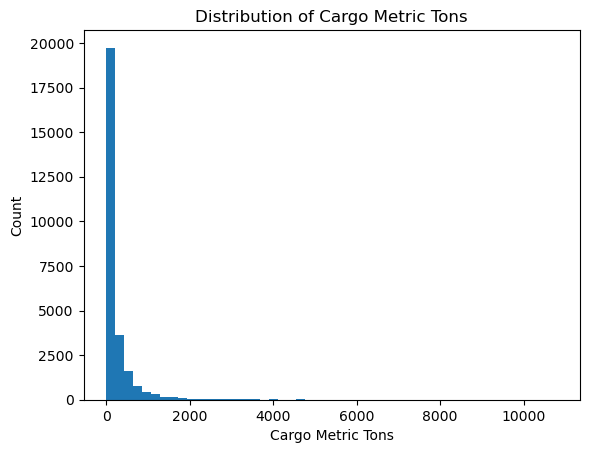

In [4]:
plt.hist(df['Cargo Metric TONS'], bins=50)
plt.title("Distribution of Cargo Metric Tons")
plt.xlabel("Cargo Metric Tons")
plt.ylabel("Count")
plt.show()

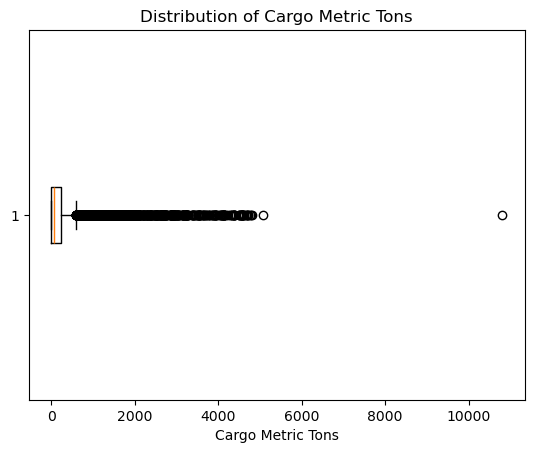

In [5]:
plt.boxplot(df['Cargo Metric TONS'], vert=False)
plt.title("Distribution of Cargo Metric Tons")
plt.xlabel("Cargo Metric Tons")
plt.show()

The distribution is not normal and skewed to the right. Most notably, the maximum value is much higher than the rest of the data, suggesting outliers. Upper outliers are defined as greater or equal to 1.5 * IQR + Q3. There are no lower outliers in this dataset.

In [6]:
outliers = df[df['Cargo Metric TONS'] >= (1.5 * (247.24 - 8.45)) + 247.24]
outliers['Cargo Metric TONS'].describe()

count     2484.000000
mean      1251.937072
std        814.587496
min        605.512001
25%        748.659316
50%        956.835407
75%       1423.548189
max      10801.278330
Name: Cargo Metric TONS, dtype: float64

The outliers consist of a significant number of points over a large range. It is better to keep the outliers to help predict for test data in this range.

However, the top two points are far above the rest of the data, so it would be best to remove them.

In [7]:
outliers = df[df['Cargo Metric TONS'] >= 5000].index
df.drop(outliers, inplace=True)
# reorganize the indices
df.reset_index(drop=True, inplace=True)
df

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Metric TONS
0,201601,Sun Country Airlines,SY,Sun Country Airlines,SY,Domestic,US,Enplaned,Cargo,Passenger,8.871509
1,200811,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Cargo,Passenger,53.946194
2,200709,Qantas Airways,QF,Qantas Airways,QF,International,Australia / Oceania,Deplaned,Express,Passenger,0.043999
3,201608,Philippine Airlines,PR,Philippine Airlines,PR,International,Asia,Deplaned,Mail,Passenger,19.023530
4,201708,Singapore Airlines,SQ,Singapore Airlines,SQ,International,Asia,Deplaned,Express,Passenger,6.951420
...,...,...,...,...,...,...,...,...,...,...,...
27223,201108,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Canada,Enplaned,Express,Passenger,5.687690
27224,200703,Asiana Airlines,OZ,Asiana Airlines,OZ,International,Asia,Deplaned,Mail,Freighter,3.473669
27225,201204,US Airways,US,US Airways,US,Domestic,US,Deplaned,Cargo,Passenger,18.564941
27226,201005,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Cargo,Passenger,9.814090


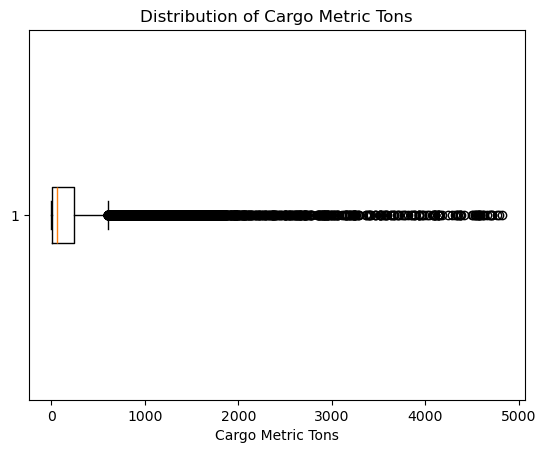

In [8]:
plt.boxplot(df['Cargo Metric TONS'], vert=False)
plt.title("Distribution of Cargo Metric Tons")
plt.xlabel("Cargo Metric Tons")
plt.show()

In [9]:
df['Operating Airline'].unique()

array(['Sun Country Airlines', 'United Airlines', 'Qantas Airways',
       'Philippine Airlines', 'Singapore Airlines',
       'Nippon Cargo Airlines', 'Lufthansa German Airlines',
       'COPA Airlines, Inc.', 'Alaska Airlines', 'Asiana Airlines',
       'Cathay Pacific', 'Korean Air Lines', 'All Nippon Airways',
       'Southwest Airlines', 'Air France', 'EVA Airways',
       'United Airlines - Pre 07/01/2013',
       'Northwest Airlines (became Delta)', 'Aer Lingus',
       'TACA International Airlines, S.A.', 'China Southern',
       'Air New Zealand', 'Air China', 'SAS Airlines', 'China Eastern',
       'Frontier Airlines', 'Horizon Air', 'Emirates', 'JetBlue Airways',
       'Kalitta Air', 'Japan Airlines', 'Delta Air Lines', 'French Bee',
       'Air Canada', 'Southern Air', 'Compass Airlines',
       'British Airways', 'Redding Aero Enterprises',
       'Swiss International', 'Etihad Airways',
       'KLM Royal Dutch Airlines', 'China Airlines', 'Hawaiian Airlines',
       'US 

In [10]:
df['Published Airline'].unique()

array(['Sun Country Airlines', 'United Airlines', 'Qantas Airways',
       'Philippine Airlines', 'Singapore Airlines',
       'Nippon Cargo Airlines', 'Lufthansa German Airlines',
       'COPA Airlines, Inc.', 'Alaska Airlines', 'Asiana Airlines',
       'Cathay Pacific', 'Korean Air Lines', 'All Nippon Airways',
       'Southwest Airlines', 'Air France', 'EVA Airways',
       'United Airlines - Pre 07/01/2013',
       'Northwest Airlines (became Delta)', 'Aer Lingus',
       'TACA International Airlines, S.A.', 'China Southern',
       'Air New Zealand', 'Air China', 'SAS Airlines', 'China Eastern',
       'Frontier Airlines', 'Emirates', 'JetBlue Airways', 'Kalitta Air',
       'Japan Airlines', 'Delta Air Lines', 'French Bee', 'Air Canada',
       'Southern Air', 'American Airlines', 'British Airways',
       'Redding Aero Enterprises', 'Swiss International',
       'Etihad Airways', 'KLM Royal Dutch Airlines', 'China Airlines',
       'Hawaiian Airlines', 'US Airways', 'Virgin Atl

There are a large number of operating and published airlines. While there could be a correlation between airlines and cargo metric tons, it is likely that airlines correlate with other features such as geo region and cargo aircraft type, given their names have "Cargo" or a location in them. It would not be worth the effort to encode either, so they will be dropped. There is also the likelihood that test data would have airlines not provided in this training sample.

In [11]:
df['Cargo Aircraft Type'].value_counts()

Cargo Aircraft Type
Passenger    22679
Freighter     4222
Combi          327
Name: count, dtype: int64

In [12]:
df['Cargo Type Code'].value_counts()

Cargo Type Code
Cargo      14906
Mail        8813
Express     3509
Name: count, dtype: int64

In [13]:
df['GEO Region'].value_counts()

GEO Region
Asia                   10081
US                      7364
Europe                  4669
Australia / Oceania     1758
Canada                  1467
Mexico                   877
Middle East              550
Central America          385
South America             77
Name: count, dtype: int64

In [14]:
df['GEO Summary'].value_counts()

GEO Summary
International    19864
Domestic          7364
Name: count, dtype: int64

``GEO Summary`` is a subset of ``GEO Region``, with ``Domestic`` equating to ``US`` and ``International`` to the other regions. Because of this, it is safe to drop ``GEO Summary``.

In [15]:
df['Activity Type Code'].value_counts()

Activity Type Code
Deplaned    13934
Enplaned    13294
Name: count, dtype: int64

Since ``Activity Type Code`` is a binary, it can be replaced by a binary encoding rather than one-hot encoding.

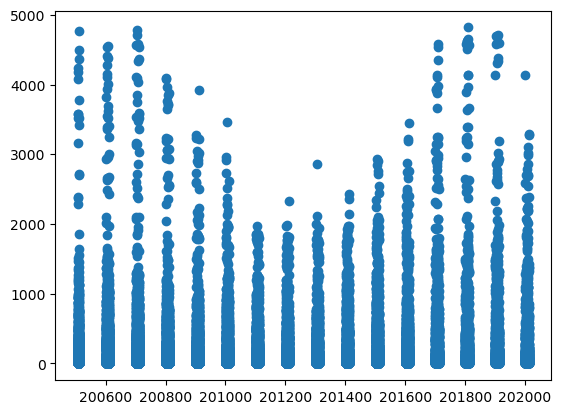

In [16]:
plt.scatter(x=df['Activity Period'], y=df['Cargo Metric TONS'])

While there is no linear correlation, there seems to be a curve, suggesting a weak polynomial correlation (ignoring the outliers).

Most of the features aren't evenly distributed. Aditionally, they don't follow an ordering scheme, so they will need to be one-hot encoded.

# Transform Data

In order to better apply our transformations to our actual test data, we can put the transformations in a function, and apply the function to the dataframe.

In [17]:
from sklearn.preprocessing import LabelBinarizer

def transform_df(dataframe):
    dataframe = dataframe.drop(['Operating Airline', 'Operating Airline IATA Code',
                                'Published Airline', 'Published Airline IATA Code'],
        axis=1)
    
    encoder = LabelBinarizer()
    encoder.fit(dataframe['GEO Region'])
    transformed = encoder.transform(dataframe['GEO Region'])
    transformed = pd.DataFrame(transformed, columns=encoder.classes_)
    dataframe = pd.concat([dataframe, transformed], axis=1)
    dataframe.drop(['GEO Summary', 'GEO Region'], inplace=True, axis=1)
    
    encoder.fit(dataframe['Cargo Type Code'])
    transformed = encoder.transform(dataframe['Cargo Type Code'])
    transformed = pd.DataFrame(transformed, columns=encoder.classes_)
    dataframe = pd.concat([dataframe, transformed], axis=1)
    dataframe.drop(['Cargo Type Code'], inplace=True, axis=1)

    encoder.fit(dataframe['Cargo Aircraft Type'])
    transformed = encoder.transform(dataframe['Cargo Aircraft Type'])
    transformed = pd.DataFrame(transformed, columns=encoder.classes_)
    dataframe = pd.concat([dataframe, transformed], axis=1)
    dataframe.drop(['Cargo Aircraft Type'], inplace=True, axis=1)
    
    dataframe['Activity Type Code'] = dataframe['Activity Type Code'].map({'Enplaned': 0, 'Deplaned': 1})

    return dataframe

In [18]:
df = transform_df(df)
df

,Activity Period,Activity Type Code,Cargo Metric TONS,Asia,Australia / Oceania,Canada,Central America,Europe,Mexico,Middle East,South America,US,Cargo,Express,Mail,Combi,Freighter,Passenger
0,201601,0,8.871509,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
1,200811,1,53.946194,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
2,200709,1,0.043999,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,201608,1,19.023530,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,201708,1,6.951420,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27223,201108,0,5.687690,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
27224,200703,1,3.473669,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
27225,201204,1,18.564941,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
27226,201005,1,9.814090,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


In [19]:
# Move target column to the front to make splitting easier
y = df.pop('Cargo Metric TONS')
df.insert(0, 'Cargo Metric TONS', y)
df

,Cargo Metric TONS,Activity Period,Activity Type Code,Asia,Australia / Oceania,Canada,Central America,Europe,Mexico,Middle East,South America,US,Cargo,Express,Mail,Combi,Freighter,Passenger
0,8.871509,201601,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
1,53.946194,200811,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
2,0.043999,200709,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,19.023530,201608,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,6.951420,201708,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27223,5.687690,201108,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
27224,3.473669,200703,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
27225,18.564941,201204,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
27226,9.814090,201005,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27228 entries, 0 to 27227
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cargo Metric TONS    27228 non-null  float64
 1   Activity Period      27228 non-null  int64  
 2   Activity Type Code   27228 non-null  int64  
 3   Asia                 27228 non-null  int64  
 4   Australia / Oceania  27228 non-null  int64  
 5   Canada               27228 non-null  int64  
 6   Central America      27228 non-null  int64  
 7   Europe               27228 non-null  int64  
 8   Mexico               27228 non-null  int64  
 9   Middle East          27228 non-null  int64  
 10  South America        27228 non-null  int64  
 11  US                   27228 non-null  int64  
 12  Cargo                27228 non-null  int64  
 13  Express              27228 non-null  int64  
 14  Mail                 27228 non-null  int64  
 15  Combi                27228 non-null 

# Models

Since we know the target (Cargo Metric Tons) and the target is continuous numerical data, linear regression or polynomial regression would be the best model to use. We are looking to see how a set of features affects the target, or if there happens to be a correlation between them. Ridge and LASSO would also work in this scenario, so we can compare the results of each model to see which produces the best results.

Due to the target being continuous data, the metric to compare models will be root mean squared error. It will provide an approximation on how off our model is from the actual ... .

## Linear Regression Mode

In [21]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(df.iloc[:,1:], df.iloc[:,0], test_size=0.2, random_state=42)
train_y

13912     602.136763
25024      64.821708
26802    1055.730866
15428      73.437840
10855     145.672279
            ...     
21575     499.878540
5390      106.685359
860        66.431534
15795       5.974366
23654       3.285425
Name: Cargo Metric TONS, Length: 21782, dtype: float64

In [22]:
from sklearn.linear_model import LinearRegression

reg_lr = LinearRegression()
reg_lr.fit(train_x, train_y)

LinearRegression()

In [23]:
from sklearn.metrics import mean_squared_error

pred_lr= reg_lr.predict(test_x)
mse_lr = mean_squared_error(test_y, pred_lr)
np.sqrt(mse_lr)

401.35350381367454

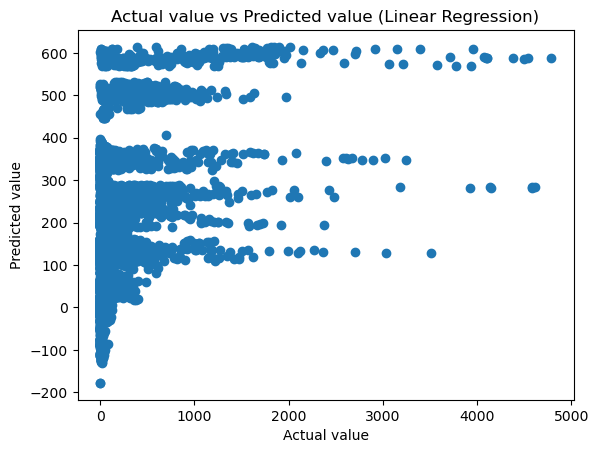

In [24]:
plt.scatter(x=test_y, y=pred_lr)
plt.title("Actual value vs Predicted value (Linear Regression)")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.show()

## Ridge model

For both ridge and LASSO, we'll use GridSearchCV to determine the best alpha value

In [25]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param = {'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
ridge = Ridge()
reg_ridge = GridSearchCV(ridge, param, scoring='neg_mean_squared_error')
reg_ridge.fit(train_x, train_y)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='neg_mean_squared_error')

In [26]:
reg_ridge.best_params_

{'alpha': 6}

In [27]:
pred_ridge= reg_ridge.predict(test_x)
mse = mean_squared_error(test_y, pred_ridge)
np.sqrt(mse)

401.3579018669645

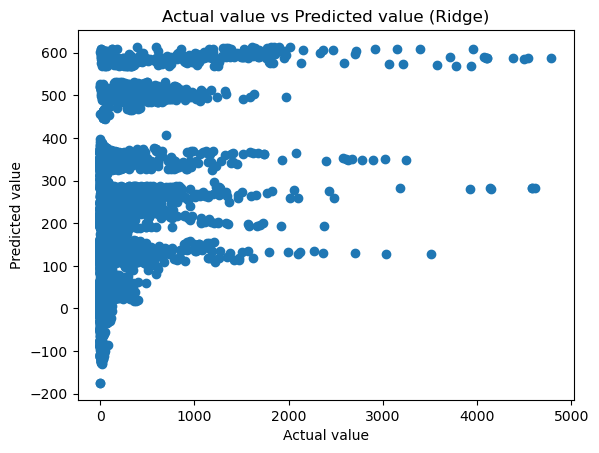

In [28]:
plt.scatter(x=test_y, y=pred_ridge)
plt.title("Actual value vs Predicted value (Ridge)")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.show()

## LASSO Model

In [29]:
from sklearn.linear_model import Lasso

lasso = Lasso()
reg_lasso = GridSearchCV(lasso, param, scoring='neg_mean_squared_error')
reg_lasso.fit(train_x, train_y)
pred_lasso = reg_lasso.predict(test_x)
mse = mean_squared_error(test_y, pred_lasso)
np.sqrt(mse)

401.78195582779637

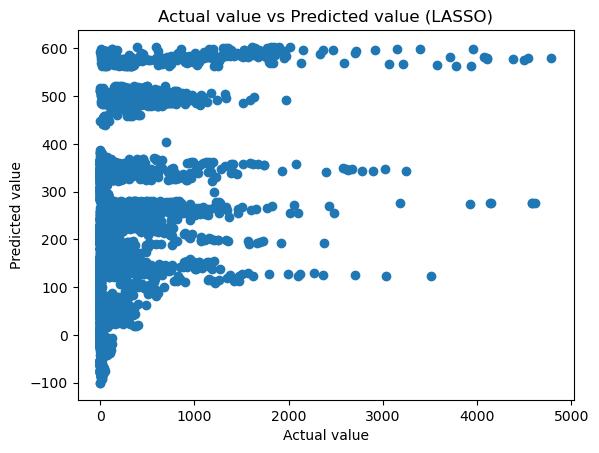

In [30]:
plt.scatter(x=test_y, y=pred_lasso)
plt.title("Actual value vs Predicted value (LASSO)")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.show()

## Polynomial Regression Model

This model adds more dimensions, so we need to fit_transform both the train and test features

In [31]:
from sklearn.preprocessing import PolynomialFeatures

pf2 = PolynomialFeatures(degree=2)
feat2_train = pf2.fit_transform(train_x)
feat2_test = pf2.fit_transform(test_x)

reg_pr2 = LinearRegression()
reg_pr2.fit(feat2_train, train_y)
pred_pr2 = reg_pr2.predict(feat2_test)
mse = mean_squared_error(test_y, pred_pr2)
np.sqrt(mse)

375.25603798830593

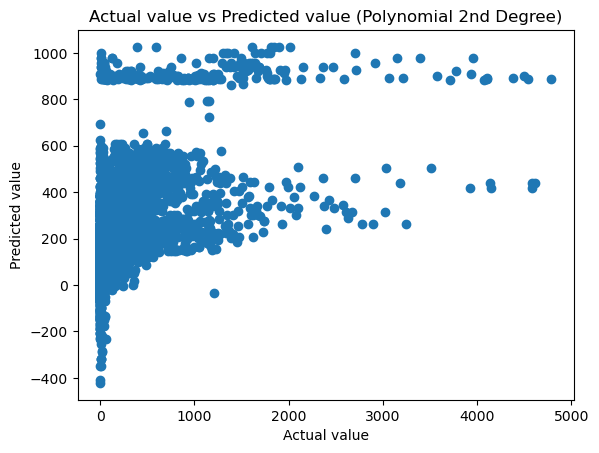

In [32]:
plt.scatter(x=test_y, y=pred_pr2)
plt.title("Actual value vs Predicted value (Polynomial 2nd Degree)")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.show()

In [33]:
pf3 = PolynomialFeatures(degree=3)
feat3_train = pf3.fit_transform(train_x)
feat3_test = pf3.fit_transform(test_x)

reg_pr3 = LinearRegression()
reg_pr3.fit(feat3_train, train_y)
pred_pr3 = reg_pr3.predict(feat3_test)
mse = mean_squared_error(test_y, pred_pr3)
np.sqrt(mse)

369.5484422306875

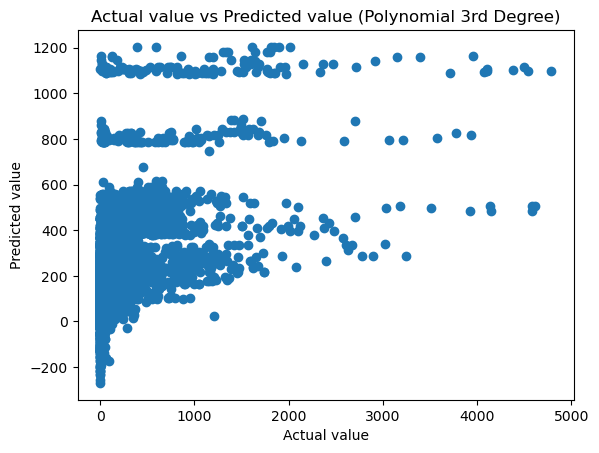

In [34]:
plt.scatter(x=test_y, y=pred_pr3)
plt.title("Actual value vs Predicted value (Polynomial 3rd Degree)")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.show()

# Model Analysis

The 3 linear models have nearly identical results. The predicted values seem to form layers, likely due to the features being discrete data. Notably, none of the linear models predicted any values greater than 1000, likely due to values in that range being outliers.

However, the two polynomial models have much less error. They also better handled the outliers, predicting values above 1000. However, they also predicted values further below zero. The polynomial models do better with predicting values on the higher end, but do worse with predicting values on the lower end.

Polynomial regression in the 3rd power produces the least error, so I will use that model on the test data. While increasing the degree would likely further reduce error, we risk the model overfitting our data.

In all of the models, negative values were predicted, which would not make sense in this context. The polynomial models were worse in this than the linear models.

# Apply model

In [35]:
test_df = pd.read_csv('Cargo Volume - Test.csv')
test_df = transform_df(test_df)
test_df = pf3.fit_transform(test_df)

pred = reg_pr3.predict(test_df)
pred_df = pd.DataFrame(pred, columns=['Cargo Metric TONS'])
pred_df

,Cargo Metric TONS
0,125.974861
1,454.309124
2,194.726162
3,505.541994
4,544.355429
...,...
6802,44.601234
6803,237.466766
6804,11.832419
6805,787.885547


In [36]:
pred_df.describe()

,Cargo Metric TONS
count,6807.000000
mean,222.103231
std,235.150550
min,-270.536631
25%,53.087561
50%,181.989572
75%,287.759404
max,1202.971702


The mean of the predicted values is close to the mean of the training set.

In [37]:
pred_df.to_csv('dc1.csv', index=False)